<h1>UNAD</h1>
<h2>Eduar Yesid González Gómez</h2>
<h2>Regresión Lineal </h2>

<h1>Pasos de la Actividad</h1>
 <div><p>1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</p></div>

<div><p>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</p></div>

<div><p>3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</p></div>

<div><p>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.</p></div>

<div><p>5. Entrenar el modelo configurando los diferentes hiperparámetros.</p></div>

<div><p>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.</p></div>

<div><p>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</p></div>

<div><p>8. Interpretar, analizar y documentar los resultados obtenidos.</p></div>

<div><p>9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/.</p></div>

<h3> 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</h3>

In [40]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix





In [41]:
rawData = pd.DataFrame(pd.read_csv('./Car details v3.csv'))

In [42]:
rawData.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [43]:
# Descripción de los datos
rawData.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

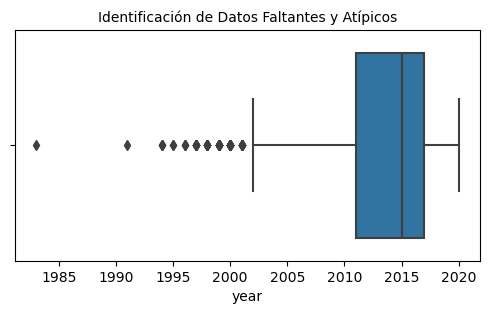

In [44]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['year'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

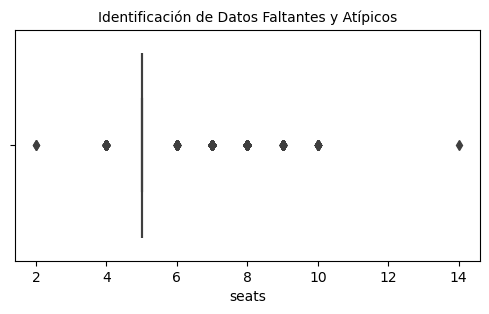

In [45]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['seats'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

<h3>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario</h3>

In [46]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Nivel de Glucosa: ",rawData['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",rawData['year'].isin([0]).sum())
print("Cantidad de Registros con cero en Grosor Piel: ",rawData['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel Insulina: ",rawData['seats'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Glucosa:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Grosor Piel:  0
Cantidad de Registros con cero en Nivel Insulina:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

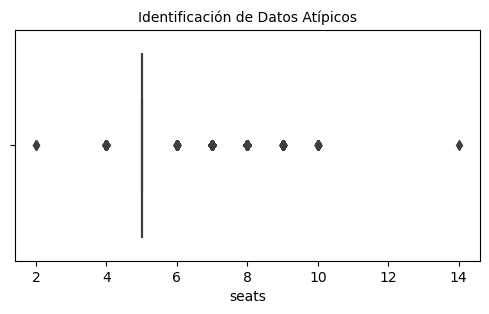

In [47]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['seats'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [48]:
#Conteo de Datos Atípicos

nivel_minimo=35000
nivel_maximo=20000000
Total_Atipicos=((rawData['selling_price']<nivel_minimo)|(rawData['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 7


In [49]:
# Filtra Datos Atípicos

rawData=rawData[(rawData['selling_price']<nivel_maximo)&(rawData['selling_price']>nivel_minimo)]

In [50]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((rawData['selling_price']<nivel_minimo)|(rawData['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

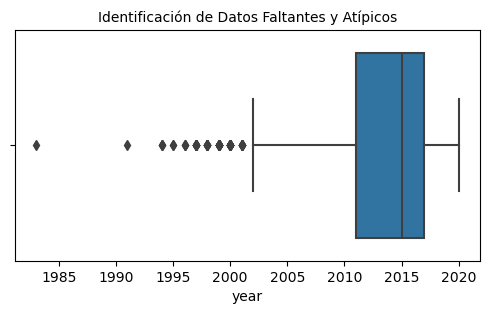

In [51]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['year'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [52]:
#Conteo de Datos Atípicos

nivel_minimo=1992
nivel_maximo=2020
Total_Atipicos=((rawData['year']<nivel_minimo)|(rawData['year']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [53]:
# Filtra Datos Atípicos

rawData=rawData[(rawData['year']<nivel_maximo)&(rawData['year']>nivel_minimo)]

In [54]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((rawData['year']<nivel_minimo)|(rawData['year']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


<h3>3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características</h3>

In [55]:
# Total de personas con Diabetes

rawData['year'].value_counts()

year
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     182
2006     124
2005      97
2004      60
2003      48
2002      25
2000      20
1999      18
1997      10
1998       9
2001       8
1996       3
1994       3
1995       2
Name: count, dtype: int64

In [56]:
rawData[['year']].head(50)

,year
0,2014
1,2014
2,2006
3,2010
4,2007
5,2017
6,2007
7,2001
8,2011
9,2013


<h3>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo</h3>

In [57]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = rawData.drop('year',axis=1) # Se cargan los datos de train sin los datos de la columna transmisión
Y = rawData['year'] # Se cargan los datos de train con los datos de la la columna transmisión

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [58]:
print (X_train)

                                           name  selling_price  km_driven  \
5614   Jaguar XE 2016-2019 2.0L Diesel Prestige        2711000       9000   
5125  Ford EcoSport 1.5 TDCi Titanium Plus BSIV         610000      90000   
2585     Toyota Innova 2.5 VX (Diesel) 7 Seater        1019999      60000   
3912                     Maruti Wagon R LXI CNG         320000      43000   
6637                 Tata Tiago 1.2 Revotron XZ         450000      15000   
...                                         ...            ...        ...   
6591                      Volvo V40 D3 R-Design        2475000       2000   
5636                       Maruti Ciaz VDi Plus         600000      70000   
7083                             Toyota Etios G         350000     100000   
7391                     Maruti Swift Dzire LDI         550000     120000   
125                          Maruti Celerio VXI         360000      40000   

        fuel seller_type transmission         owner     mileage   engine  \

In [59]:
print (Y_train)

5614    2017
5125    2015
2585    2014
3912    2016
6637    2017
        ... 
6591    2018
5636    2015
7083    2013
7391    2018
125     2015
Name: year, Length: 6030, dtype: int64


<h3> 5. Entrenar el modelo configurando los diferentes hiperparámetros </h3>

In [60]:
rawData["year"].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 1999, 2000, 2004, 1996,
       1994, 1995, 1998, 1997], dtype=int64)

In [61]:
print(rawData["year"].unique())

[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 1999 2000 2004 1996 1994 1995 1998 1997]


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6432, 12)
(6432,)
(1608, 12)
(1608,)


In [81]:
modelo_regresion = LinearRegression(solver="liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validació

TypeError: LinearRegression.__init__() takes 1 positional argument but 2 were given